In [103]:
import pandas as pd
import os

import matplotlib.pyplot as plt

from itertools import combinations
from collections import Counter

In [47]:
#Merge 12 months into one

df = pd.read_csv(r"C:\Users\ADMIN\Desktop\Sales Data\Sales_April_2019.csv")

files = [file for file in os.listdir(r"C:\Users\ADMIN\Desktop\Sales Data")]

all_months_data = pd.DataFrame()

for file in files: 
    df = pd.read_csv("C:/Users/ADMIN/Desktop/Sales Data/"+file)
    all_months_data = pd.concat([all_months_data, df])

all_months_data.to_csv("all_data.csv", index = False)
all_data = pd.read_csv(r"C:\Users\ADMIN\Desktop\all_data.csv")

In [48]:
#Data Cleaning
#Cleaning NaN results

nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.describe

all_data = all_data.dropna(how="all")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [87]:
#Filter data with incorrect order date format
all_data = all_data[all_data["Order Date"].str[0:2] != "Or"]

#Convert columns to correct type
all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"])
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"])
all_data["Order Date"] = pd.to_datetime(all_data["Order Date"])

AttributeError: Can only use .str accessor with string values!

In [88]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [78]:
#Augment data with additional columns

#Adding a month column
all_data["Month"] = all_data["Order Date"].str[0:2]
all_data["Month"] = all_data["Month"].astype(int)
all_data.head()

#Adding a city column
all_data["City"] = all_data["Purchase Address"].apply(lambda x: x.split(",")[1] + x.split(",")[2][0:3])
 
#Adding a sales column
all_data["Sales"] = all_data["Quantity Ordered"] * all_data["Price Each"]

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [79]:
#Question 1: What was the best month for sales? How much was earned that month?
sales_by_months = all_data.groupby("Month").sum()["Sales"]
sales_by_months.head(12)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14008\654960223.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_by_months = all_data.groupby("Month").sum()["Sales"]


Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

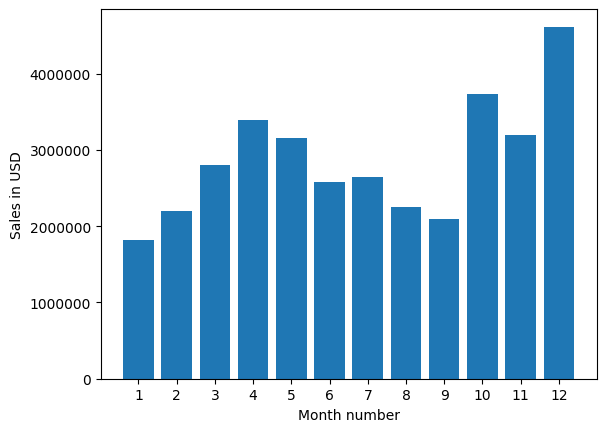

In [58]:
months = range(1,13)

plt.bar(months, sales_by_months)
plt.xticks(months)
plt.ticklabel_format(style='plain')  # to prevent scientific notation.
plt.ylabel("Sales in USD")
plt.xlabel("Month number")
plt.show()

In [82]:
#Question 2: What city sold the most product? 
quantity_by_city = all_data.groupby("City").sum()["Quantity Ordered"]
quantity_by_city.head(20)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14008\314967814.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity_by_city = all_data.groupby("City").sum()["Quantity Ordered"]


City
 Atlanta GA          16602
 Austin TX           11153
 Boston MA           22528
 Dallas TX           16730
 Los Angeles CA      33289
 New York City NY    27932
 Portland ME          2750
 Portland OR         11303
 San Francisco CA    50239
 Seattle WA          16553
Name: Quantity Ordered, dtype: int64

Text(0, 0.5, 'Quantity ordered')

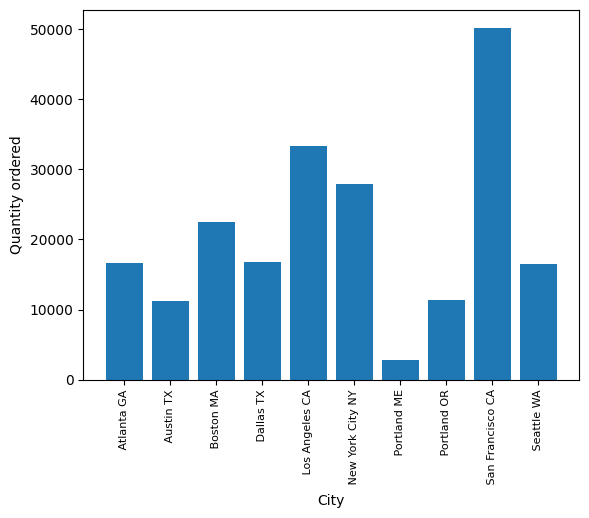

In [84]:
city = [city for city, df in all_data.groupby("City")]

plt.bar(city, quantity_by_city)
plt.xticks(city, rotation = "vertical", size = 8)
plt.xlabel("City")
plt.ylabel("Quantity ordered")

In [89]:
#What time should we display advertisemens to maximize the likelihood of customer’s buying product?

all_data["Hour"] = all_data["Order Date"].dt.hour
all_data["Minute"] = all_data["Order Date"].dt.minute

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27


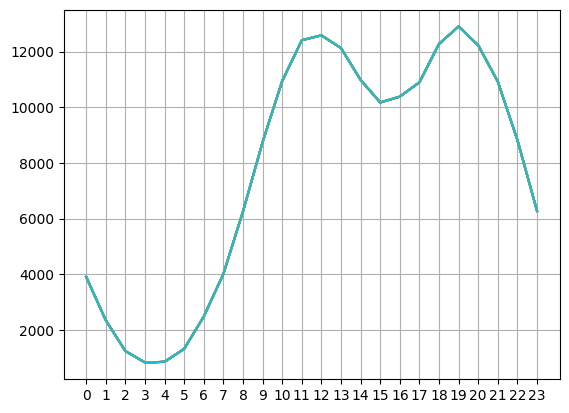

In [95]:
hours = [hour for hour, df in all_data.groupby("Hour")]

plt.plot(hours, all_data.groupby("Hour").count())
plt.ticklabel_format(style='plain') 
plt.xticks(hours)
plt.grid()

In [101]:
#Question 4: What products are often sold together?

df = all_data[all_data["Order ID"].duplicated(keep = False)]

df["Grouped"] = df.groupby("Order ID")["Product"].transform(lambda x: ','.join(x))

df = df[["Order ID", "Grouped"]].drop_duplicates()

df.head()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14008\485113448.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Grouped"] = df.groupby("Order ID")["Product"].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [107]:
count = Counter()

for row in df["Grouped"]:
    row_list = row.split(",")
    count.update(Counter(combinations(row_list, 3)))
    
count.most_common(10)

[(('Google Phone', 'USB-C Charging Cable', 'Wired Headphones'), 87),
 (('iPhone', 'Lightning Charging Cable', 'Wired Headphones'), 62),
 (('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones'), 47),
 (('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones'), 35),
 (('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones'), 33),
 (('iPhone', 'Apple Airpods Headphones', 'Wired Headphones'), 27),
 (('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones'), 24),
 (('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones'),
  16),
 (('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones'),
  5),
 (('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones'), 5)]

In [109]:
#Question 4: What product sold the most?
quantity_by_products = all_data.groupby("Product").sum()["Quantity Ordered"]
quantity_by_products.head(12)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14008\2053832473.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity_by_products = all_data.groupby("Product").sum()["Quantity Ordered"]


Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Name: Quantity Ordered, dtype: int64

Text(0, 0.5, 'Quantity ordered')

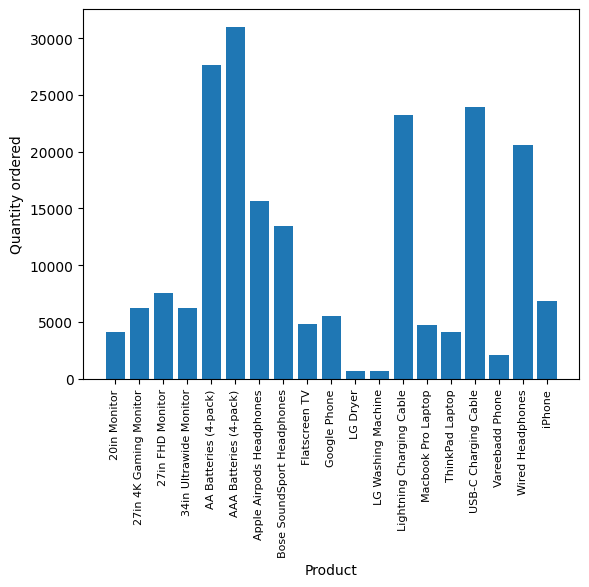

In [111]:
products = [product for product, df in all_data.groupby("Product")]

plt.bar(products, quantity_by_products)
plt.xticks(products, rotation = "vertical", size = 8)
plt.xlabel("Product")
plt.ylabel("Quantity ordered")

In [112]:
prices = all_data.groupby("Product").mean()['Price Each']

prices.head()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14008\1196826236.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices = all_data.groupby("Product").mean()['Price Each']


Product
20in Monitor              109.99
27in 4K Gaming Monitor    389.99
27in FHD Monitor          149.99
34in Ultrawide Monitor    379.99
AA Batteries (4-pack)       3.84
Name: Price Each, dtype: float64

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14008\4133095403.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation = "vertical", size = 8)


[Text(0, 0, '20in Monitor'),
 Text(1, 0, '27in 4K Gaming Monitor'),
 Text(2, 0, '27in FHD Monitor'),
 Text(3, 0, '34in Ultrawide Monitor'),
 Text(4, 0, 'AA Batteries (4-pack)'),
 Text(5, 0, 'AAA Batteries (4-pack)'),
 Text(6, 0, 'Apple Airpods Headphones'),
 Text(7, 0, 'Bose SoundSport Headphones'),
 Text(8, 0, 'Flatscreen TV'),
 Text(9, 0, 'Google Phone'),
 Text(10, 0, 'LG Dryer'),
 Text(11, 0, 'LG Washing Machine'),
 Text(12, 0, 'Lightning Charging Cable'),
 Text(13, 0, 'Macbook Pro Laptop'),
 Text(14, 0, 'ThinkPad Laptop'),
 Text(15, 0, 'USB-C Charging Cable'),
 Text(16, 0, 'Vareebadd Phone'),
 Text(17, 0, 'Wired Headphones'),
 Text(18, 0, 'iPhone')]

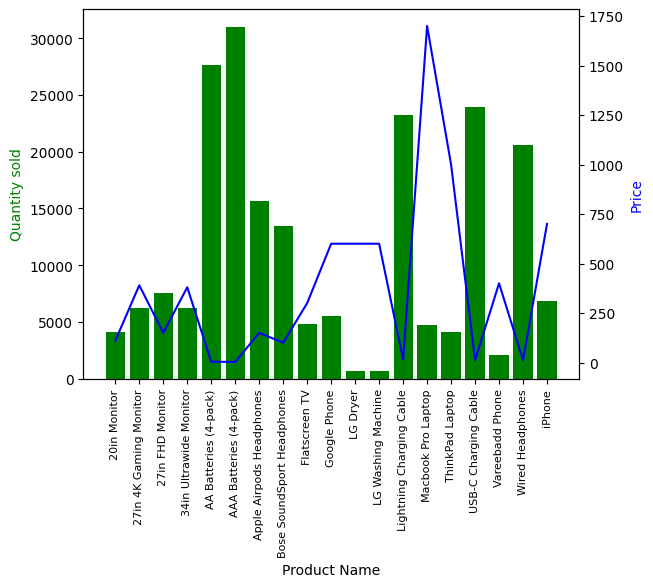

In [121]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_by_products, color = 'g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel("Product Name")
ax1.set_ylabel("Quantity sold", color = 'g')
ax2.set_ylabel("Price", color = 'b')
ax1.set_xticklabels(products, rotation = "vertical", size = 8)